In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as pp
import DateTime as dt
import datetime as date

### 1. Import claims_data.csv and cust_data.csv which is provided to you and
combine the two datasets appropriately to create a 360-degree view of
the data. Use the same for the subsequent questions.

In [2]:
claims=pd.read_csv('claims.csv')

In [3]:
cust_demographics=pd.read_csv('cust_demographics.csv')

In [4]:
cust_demographics.head(1)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum


In [5]:
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [6]:
cust_info=pd.merge(left=cust_demographics,right=claims,left_on='CUST_ID',right_on='customer_id',how = 'inner')

In [7]:
cust_info.drop(columns='customer_id',inplace=True)

In [8]:
cust_info.head(5)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


### 2. Perform a data audit for the datatypes and find out if there are any
mismatch within the current datatypes of the columns and their
business significance.

In [9]:
cust_info.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [10]:
cust_info['Contact']=cust_info['Contact'].str.replace("-","")


In [11]:
#cust_info['DateOfBirth']=pd.to_datetime(cust_info['DateOfBirth'],format='%Y-%m-%d')
cust_info['claim_date']=pd.to_datetime(cust_info['claim_date'])
cust_info['Contact']=pd.to_numeric(cust_info['Contact'])


In [12]:
cust_info.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,7899168172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,2655431264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,7986314758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,7986314758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,4131877945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No


In [13]:
cust_info.dtypes

CUST_ID                         int64
gender                         object
DateOfBirth                    object
State                          object
Contact                         int64
Segment                        object
claim_id                        int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
dtype: object

### 3.Convert the column claim_amount to numeric. Use the appropriate
modules/attributes to remove the $ sign.

In [14]:
cust_info['claim_amount']=cust_info['claim_amount'].str.replace("$","")
cust_info['claim_amount']=pd.to_numeric(cust_info['claim_amount'])

<ipython-input-14-607dca4e36b1>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  cust_info['claim_amount']=cust_info['claim_amount'].str.replace("$","")


In [15]:
cust_info.head(1)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,7899168172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No


### 4. Of all the injury claims, some of them have gone unreported with the
police. Create an alert flag (1,0) for all such claims.

In [16]:
cust_info['alert flag']=(cust_info.police_report=='Yes').astype(int)

In [17]:
cust_info

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert flag
0,21868593,Female,12-Jan-79,VT,7899168172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,13-Jan-70,ME,2655431264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0
2,30308357,Female,11-Mar-84,TN,7986314758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0
3,30308357,Female,11-Mar-84,TN,7986314758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0
4,47830476,Female,01-May-86,MA,4131877945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,4594254319,Platinum,62020796,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,1
1081,42364152,Female,07-Jul-96,ID,5294621635,Silver,63269067,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,0
1082,19888166,Male,11-Apr-90,WI,7126519613,Gold,22690595,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,1
1083,11256802,Female,22-Oct-64,LA,4693455617,Silver,12376894,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0


5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique.Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [18]:
cust_information=cust_info.groupby('CUST_ID').first().drop_duplicates()

6.Check for missing values and impute the missing values with an
appropriate value. (mean for continuous and mode for categorical)

In [19]:
#cust_information['total_policy_claims']=cust_information.total_policy_claims.convert_dtypes(convert_integer=True)

In [20]:
cust_information.isnull().sum()

gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
alert flag              0
dtype: int64

In [21]:
cust_information.claim_amount.replace(np.nan,cust_information.claim_amount.mean(),inplace=True)

In [22]:
mode = cust_information[cust_information["total_policy_claims"]!=np.NaN]["total_policy_claims"].mode()[0]
cust_information['total_policy_claims'] = cust_information['total_policy_claims'].replace(np.NaN, mode)


In [23]:
cust_information.isnull().sum()

gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
alert flag             0
dtype: int64

In [24]:
cust_information.total_policy_claims.drop_duplicates()

CUST_ID
154557      1.0
287476      2.0
524545      3.0
1123356     5.0
3159546     4.0
12015897    6.0
18361978    7.0
46129941    8.0
Name: total_policy_claims, dtype: float64

### 7.Calculate the age of customers in years. Based on the age, categorize the
customers according to the below criteria
Children < 18
Youth 18-30
Adult 30-60
Senior > 60

In [25]:
 #np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')
pd.DatetimeIndex(cust_information['DateOfBirth']).year

Int64Index([1978, 1972, 1988, 2071, 1980, 1994, 1977, 1997, 2062, 2060,
            ...
            2068, 1989, 1993, 1985, 1993, 2065, 2066, 2063, 1995, 1995],
           dtype='int64', name='DateOfBirth', length=1078)

In [26]:
Tod=date.date.today()

cust_information['age']=abs(Tod.year-pd.DatetimeIndex(cust_information['DateOfBirth']).year)
#cust_information['age']=abs(cust_information.age)

In [27]:
cust_information.age.drop_duplicates()

CUST_ID
154557      44
263204      50
287476      34
441097      49
524545      42
608461      28
684748      45
804961      25
885337      40
1123356     38
1163515     27
1407979     35
1924109     41
2327487     23
2476913     39
2590748     31
2632562     37
3124373     43
3497881     47
5027573     33
5345468     29
6125426     24
6342530     48
6563653     46
6984936     30
8039037     36
10330113    26
16444738    32
Name: age, dtype: int64

In [28]:
def cat(cust_information):   # row is a Series
    if cust_information.age<18:
        return  'Children'
    elif cust_information.age>18 and cust_information.age<30:
        return 'Youth'
    elif cust_information.age>30 and cust_information.age<60:
        return 'Adult'
    elif cust_information.age>60:
        return 'Senior'
    else:
        return 'NAN'
  

In [29]:
cust_information["category"] = cust_information.apply(cat, axis=1)


In [30]:
cust_information

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert flag,age,category
CUST_ID,,,,,,,,,,,,,,,,,
154557,Female,23-May-78,DE,9628791238,Platinum,69348631,Driver error,2018-04-10,Auto,No,Injury only,12470.498519,1.0,Yes,0,44,Adult
263204,Male,20-Dec-72,TX,1738926314,Silver,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0,50,Adult
287476,Male,28-Jul-88,FL,3645981549,Silver,45780237,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,0,34,Adult
441097,Male,19-Aug-71,CA,1873488375,Gold,89833962,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,1,49,Adult
524545,Female,10-Aug-80,NC,7988625398,Gold,35782742,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0,42,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99674324,Male,28-Jan-65,UT,5175624916,Silver,4549014,Other causes,2018-07-07,Auto,No,Injury only,21480.000000,1.0,No,0,43,Adult
99723844,Female,19-Jun-66,HI,4577521374,Gold,35453672,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.000000,1.0,No,1,44,Adult
99761663,Female,18-Nov-63,NC,6432464718,Silver,37305754,Natural causes,2018-04-04,Auto,No,Material only,1242.000000,1.0,Yes,0,41,Adult


In [31]:
cust_information.age.drop_duplicates()

CUST_ID
154557      44
263204      50
287476      34
441097      49
524545      42
608461      28
684748      45
804961      25
885337      40
1123356     38
1163515     27
1407979     35
1924109     41
2327487     23
2476913     39
2590748     31
2632562     37
3124373     43
3497881     47
5027573     33
5345468     29
6125426     24
6342530     48
6563653     46
6984936     30
8039037     36
10330113    26
16444738    32
Name: age, dtype: int64

In [32]:
cust_information.category.drop_duplicates()

CUST_ID
154557     Adult
608461     Youth
6984936      NAN
Name: category, dtype: object

### 8. What is the average amount claimed by the customers from various segments?

In [33]:
cust_information.groupby('Segment')[['claim_amount']].mean()

,claim_amount
Segment,
Gold,12756.479697
Platinum,12369.304648
Silver,12269.434851


### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [34]:
cust_information.head(10)

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert flag,age,category
CUST_ID,,,,,,,,,,,,,,,,,
154557,Female,23-May-78,DE,9628791238,Platinum,69348631,Driver error,2018-04-10,Auto,No,Injury only,12470.498519,1.0,Yes,0,44,Adult
263204,Male,20-Dec-72,TX,1738926314,Silver,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0,50,Adult
287476,Male,28-Jul-88,FL,3645981549,Silver,45780237,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,0,34,Adult
441097,Male,19-Aug-71,CA,1873488375,Gold,89833962,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,1,49,Adult
524545,Female,10-Aug-80,NC,7988625398,Gold,35782742,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0,42,Adult
608461,Male,17-Dec-94,AR,9631872873,Platinum,7180084,Crime,2018-07-14,Auto,No,Material only,2630.000000,1.0,No,0,28,Youth
684748,Male,03-Aug-77,AK,6133852863,Gold,7238381,Other driver error,2018-07-14,Auto,No,Material only,2920.000000,2.0,No,0,45,Adult
804961,Female,07-Dec-97,AL,4877234167,Gold,87184588,Other causes,2017-10-10,Auto,No,Material and injury,21190.000000,1.0,No,0,25,Youth
885337,Male,17-Feb-62,HI,3215345263,Platinum,86240106,Driver error,2017-07-01,Auto,No,Material only,2490.000000,2.0,No,0,40,Adult


In [35]:
date.date.fromisoformat('2018-10-01')-date.timedelta(days=20)

datetime.date(2018, 9, 11)

In [36]:
cust_information.groupby('incident_cause')[['claim_amount']].sum()

,claim_amount
incident_cause,
Crime,7.592525e+05
Driver error,3.517208e+06
Natural causes,1.384761e+06
Other causes,4.222545e+06
Other driver error,3.559431e+06


In [37]:
cust_information.loc[cust_information.claim_date< '2018-09-11'].groupby('incident_cause')[['claim_amount']].sum()

,claim_amount
incident_cause,
Crime,7.244625e+05
Driver error,3.264286e+06
Natural causes,1.312706e+06
Other causes,3.725038e+06
Other driver error,3.318806e+06


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [38]:
cust_information.head(1)

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert flag,age,category
CUST_ID,,,,,,,,,,,,,,,,,
154557,Female,23-May-78,DE,9628791238,Platinum,69348631,Driver error,2018-04-10,Auto,No,Injury only,12470.498519,1.0,Yes,0,44,Adult


In [39]:
cust_information.groupby(cust_information['category']=='Adult').sum()

,Contact,claim_id,claim_amount,total_policy_claims,alert flag,age
category,,,,,,
False,1321076393333,10405632351,2.784652e+06,387.0,43,6124
True,4737339032013,42260738691,1.065855e+07,1313.0,124,35266


In [40]:
cust_information[(cust_information['State']=='TX') | (cust_information['State']=='AK')|(cust_information['State']=='DE')]

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert flag,age,category
CUST_ID,,,,,,,,,,,,,,,,,
154557,Female,23-May-78,DE,9628791238,Platinum,69348631,Driver error,2018-04-10,Auto,No,Injury only,12470.498519,1.0,Yes,0,44,Adult
263204,Male,20-Dec-72,TX,1738926314,Silver,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0,50,Adult
684748,Male,03-Aug-77,AK,6133852863,Gold,7238381,Other driver error,2018-07-14,Auto,No,Material only,2920.000000,2.0,No,0,45,Adult
1163515,Female,03-Feb-95,TX,9783527634,Silver,94303580,Crime,2017-04-25,Auto,Yes,Injury only,30540.000000,1.0,No,1,27,Youth
2632562,Female,14-Dec-85,AK,4985979658,Platinum,4506676,Other driver error,2018-05-14,Home,Unknown,Material only,1400.000000,1.0,No,0,37,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92971195,Male,02-Feb-75,DE,8921734657,Gold,92399694,Other driver error,2018-09-26,Home,No,Material only,1140.000000,1.0,No,0,47,Adult
94643289,Male,24-Apr-98,AK,3176121425,Silver,34596802,Driver error,2018-03-14,Auto,No,Material and injury,45287.000000,1.0,Yes,0,24,Youth
94953428,Female,07-Dec-77,DE,6715179548,Gold,97983922,Other causes,2017-06-18,Auto,No,Material only,2210.000000,3.0,No,0,45,Adult


In [41]:
cust_information.incident_cause.str.contains('Driver',regex=False).groupby(cust_information['category']=='Adult').sum()

category
False     56
True     200
Name: incident_cause, dtype: int64

In [42]:
cust_information['category']=='Adult'

CUST_ID
154557       True
263204       True
287476       True
441097       True
524545       True
            ...  
99674324     True
99723844     True
99761663     True
99892000    False
99961993    False
Name: category, Length: 1078, dtype: bool

In [43]:
cust_information.loc[(cust_information.incident_cause.str.contains('Driver',regex=False)) &(cust_information['category']=='Adult')& ((cust_information['State']=='TX') | (cust_information['State']=='AK')|(cust_information['State']=='DE'))].groupby('State')['State'].count()

State
AK    5
DE    7
TX    5
Name: State, dtype: int64

### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [44]:
cust_information.head(1)

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert flag,age,category
CUST_ID,,,,,,,,,,,,,,,,,
154557,Female,23-May-78,DE,9628791238,Platinum,69348631,Driver error,2018-04-10,Auto,No,Injury only,12470.498519,1.0,Yes,0,44,Adult


In [45]:
Q11=cust_information.groupby(['gender','Segment'])[['claim_amount']].sum().reset_index()

In [46]:
Q11=Q11.pivot(columns='Segment',index='gender',values='claim_amount')

array([<AxesSubplot:ylabel='Gold'>, <AxesSubplot:ylabel='Platinum'>,
       <AxesSubplot:ylabel='Silver'>], dtype=object)

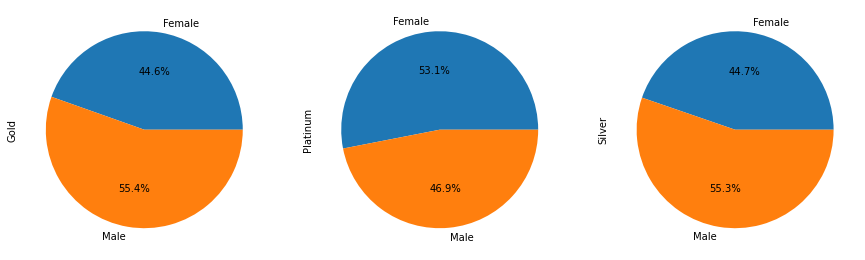

In [47]:
Q11.plot(kind='pie',subplots = True,legend = False,autopct='%1.1f%%',figsize = (15,15))


### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart


In [48]:
cust_information.head(1)

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert flag,age,category
CUST_ID,,,,,,,,,,,,,,,,,
154557,Female,23-May-78,DE,9628791238,Platinum,69348631,Driver error,2018-04-10,Auto,No,Injury only,12470.498519,1.0,Yes,0,44,Adult


In [49]:
C=cust_information.loc[cust_information.incident_cause.str.contains('Driver')].groupby('gender')[['gender']].count()

In [50]:
#C.groupby('gender')[['incident_cause']].count()


<AxesSubplot:xlabel='gender'>

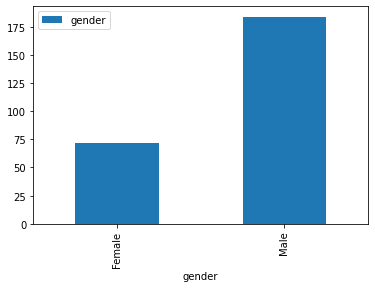

In [51]:
C.plot(kind='bar')

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [52]:
cust_information['D']=np.where(cust_information.fraudulent == "Yes",1,0)

In [53]:
E=cust_information.groupby(["category"])['D'].sum()

<AxesSubplot:xlabel='category'>

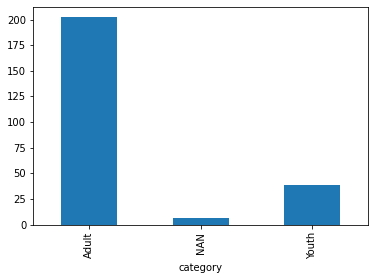

In [54]:
E.plot(kind='bar')

In [55]:
cust_information=cust_information.drop(columns='D')

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [56]:
cust_information['monthly_claimed']=cust_information['claim_date'].dt.month
cust_information['year_claimed']=cust_information['claim_date'].dt.year

In [57]:
F=cust_information.groupby(['year_claimed','monthly_claimed'])[['claim_amount']].sum().sort_values(['year_claimed','monthly_claimed'])

In [58]:
F

claim_amount
year_claimed monthly_claimed               
2017         1                610302.495558
             2                633523.997038
             3                615513.997038
             4                747944.498519
             5                546647.995558
             6                560112.498519
             7                790743.994077
             8                431553.997038
             9                459250.489635
             10               647201.995558
             11               601124.997038
             12               696701.498519
2018         1                721709.494077
             2                499582.997038
             3                704579.995558
             4                528126.998519
             5                567563.492596
             6                716220.492596
             7                588290.992596
             8                479649.498519
             9                521397.495558
             10               775453.492596

<AxesSubplot:xlabel='year_claimed,monthly_claimed'>

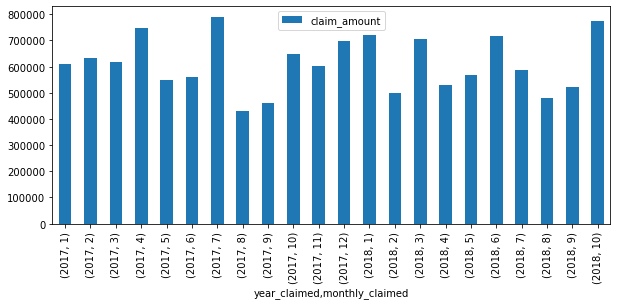

In [59]:
F.plot(kind='bar',figsize = (10,4))

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [60]:
cust_information.head(1)

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert flag,age,category,monthly_claimed,year_claimed
CUST_ID,,,,,,,,,,,,,,,,,,,
154557,Female,23-May-78,DE,9628791238,Platinum,69348631,Driver error,2018-04-10,Auto,No,Injury only,12470.498519,1.0,Yes,0,44,Adult,4,2018


In [61]:
cust_information.groupby(['gender','category'])[['claim_amount']].mean()

claim_amount
gender category              
Female Adult     12043.700171
       NAN       11948.692308
       Youth     12357.725360
Male   Adult     13095.496456
       NAN       16477.599852
       Youth     11359.009336

In [62]:
fraudulent_Yes=cust_information.loc[(cust_information['fraudulent']=='Yes')].groupby(['gender','category'])[['claim_amount']].mean()

In [63]:
fraudulent_No=cust_information.loc[(cust_information['fraudulent']=='No')].groupby(['gender','category'])[['claim_amount']].mean()

<AxesSubplot:title={'center':'fraudulent_No'}, xlabel='gender,category'>

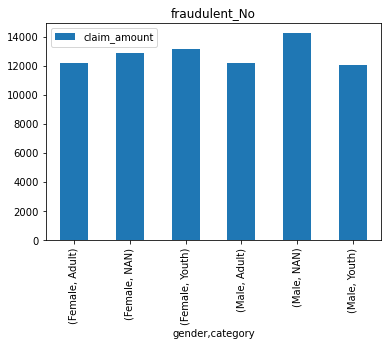

In [64]:
fraudulent_No.plot(kind='bar',title='fraudulent_No')

<AxesSubplot:title={'center':'fraudulent_Yes'}, xlabel='gender,category'>

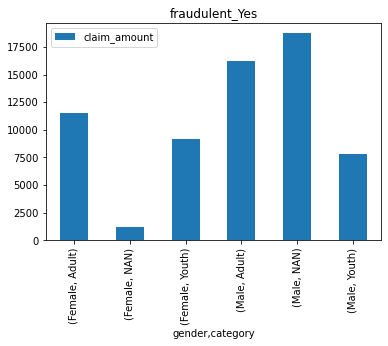

In [65]:
fraudulent_Yes.plot(kind='bar',title='fraudulent_Yes')

Based on the conclusions from exploratory analysis as well as suitable
statistical tests, answer the below questions. Please include a detailed
write-up on the parameters taken into consideration, the Hypothesis
testing steps, conclusion from the p-values and the business implications of
the statements.

In [66]:
import scipy.stats as stats

### 16. Is there any similarity in the amount claimed by males and females?

In [67]:
cust_information.head(5)

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert flag,age,category,monthly_claimed,year_claimed
CUST_ID,,,,,,,,,,,,,,,,,,,
154557,Female,23-May-78,DE,9628791238,Platinum,69348631,Driver error,2018-04-10,Auto,No,Injury only,12470.498519,1.0,Yes,0,44,Adult,4,2018
263204,Male,20-Dec-72,TX,1738926314,Silver,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0,50,Adult,4,2018
287476,Male,28-Jul-88,FL,3645981549,Silver,45780237,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,0,34,Adult,10,2017
441097,Male,19-Aug-71,CA,1873488375,Gold,89833962,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,1,49,Adult,3,2018
524545,Female,10-Aug-80,NC,7988625398,Gold,35782742,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0,42,Adult,7,2018


In [68]:
Male=cust_information['claim_amount'].loc[cust_information['gender']=='Male']

In [69]:
Female=cust_information['claim_amount'].loc[cust_information['gender']=='Female']

In [70]:
Male.mean()

12822.81660016878

In [71]:
Female.mean()

12102.135592140887

H0= No relation 
Ha= There is a relationship

two see difference between the means of two group we use 't-test'

#T-Test

In [72]:
Ho=stats.ttest_ind(a= Male,b= Female, equal_var=False)

In [73]:
Ha=stats.ttest_ind(a= Male,b= Female,equal_var=True)

In [74]:
print('null hypothesis',Ho, '&','alternative hypothesis',Ha)

null hypothesis Ttest_indResult(statistic=0.8855042038952905, pvalue=0.3760826268637353) & alternative hypothesis Ttest_indResult(statistic=0.8848703612768547, pvalue=0.3764242430541366)


In [75]:
#Ho & Ha is very similar .
#we will consider it as Ho variance

In [76]:
s= Ho.statistic
p= Ho.pvalue
print('statistic:',s,'pvalue:',p)

statistic: 0.8855042038952905 pvalue: 0.3760826268637353


In [77]:
p<0.05

False

P value is smaller then 0.05 so Therefore, we reject the null hypothesis, and accept the alternative hypothesis.

### 17. Is there any relationship between age category and segment?

to see relationship between Category & segment we use "chi-square test"

#chi-square test

H0= No relation 
Ha= There is a relationship 

In [78]:
cat_seg=pd.crosstab(cust_information.category,cust_information.Segment,margins = True)

In [79]:
CHIS_TEST=stats.chi2_contingency(observed= cat_seg)

In [80]:
print("The chi square stat is {} and the p value is {}".format(CHIS_TEST[0],CHIS_TEST[1]))

The chi square stat is 4.868323953620247 and the p value is 0.8456323534973862


test is greter than 0.05,fail to reject the null hypothesis so here is no relationship between age category and segment

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [81]:
cust_information.head(1)

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert flag,age,category,monthly_claimed,year_claimed
CUST_ID,,,,,,,,,,,,,,,,,,,
154557,Female,23-May-78,DE,9628791238,Platinum,69348631,Driver error,2018-04-10,Auto,No,Injury only,12470.498519,1.0,Yes,0,44,Adult,4,2018


In [82]:
YY18=cust_information.loc[cust_information.year_claimed==2018]["claim_amount"]
YY16_YY17=cust_information.loc[cust_information.year_claimed==2017]["claim_amount"]

In [83]:
YY16_YY17.mean()

12295.85000686223

In [84]:
YY18.mean()

12687.266007597704

t-test

In [85]:
# The H0=  No relationship between the 2016-17 claim amounts and current claim amounts,
# Ha= Retionship exists;

In [86]:
Ho=stats.ttest_ind(a= YY18,b= YY16_YY17, equal_var=False)

In [87]:
Ha=stats.ttest_ind(a= YY18,b= YY16_YY17, equal_var=True)

In [88]:
print('Ho pvalue:',Ho[1],'&','Ha pvalue:',Ha[1])

Ho pvalue: 0.6334541151965405 & Ha pvalue: 0.6328929702726953


In [89]:
#Ho & Ha is very similar .
#we will consider it as Ho variance

In [90]:
print('we will consider it as Ho variance pvalue is :',Ho.pvalue)

we will consider it as Ho variance pvalue is : 0.6334541151965405


In [91]:
p<0.05

False

P value is smaller then 0.05 so Therefore, we reject the null hypothesis,
and accept the alternative hypothesis.

yes There is  current year has shown a significant rise in claim amounts as compared to 2016-17

### 19. Is there any difference between age groups and insurance claims?

In [92]:
cust_information.age.mean()

38.39517625231911

In [93]:
cust_information.category.unique()

array(['Adult', 'Youth', 'NAN'], dtype=object)

In [94]:
#Ho=no difference between age groups and insurance claims
#Ha=difference between age groups and insurance claims

In [95]:
Adult=cust_information['total_policy_claims'].loc[cust_information['category']=='Adult']

In [96]:
Youth=cust_information['total_policy_claims'].loc[cust_information['category']=='Youth']

In [97]:
Adult.count()

847

In [98]:
Youth.count()

208

In [99]:
print('here population means same for this two for group1 Adult :',Adult.mean(),'& group2 for Youth :',Youth.mean(),' and  sample size is for group1 Adult:',Adult.count(),'& group2 Youth:',Youth.count(),' sample size is different so we can use Anova test')

here population means same for this two for group1 Adult : 1.5501770956316412 & group2 for Youth : 1.6538461538461537  and  sample size is for group1 Adult: 847 & group2 Youth: 208  sample size is different so we can use Anova test


In [100]:
anova_test=stats.f_oneway(Adult,Youth)

In [101]:
anova_test.statistic

1.4180462363676238

In [102]:
anova_test.pvalue

0.23399361570188368

In [103]:
p>0.05

True

and here we reject Ho and say that yes here is  difference between age groups and insurance claims

### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [104]:
#to check relationship we check Correlation

In [106]:
cust_information.total_policy_claims.corr(other=cust_information.claim_amount)

-0.014800926105370035

here correlation is negative so it's inversely propotional to the claimed amount.